# Import des ressources

In [10]:
import pandas as pd


import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

from sklearn.metrics import silhouette_score
from tqdm import tqdm

# fix pour plotly express et Visual Studio Code
import plotly.io as pio
pio.renderers.default = "notebook_connected"

# Import de la data

In [11]:
df_clients = pd.read_csv('df_clients.csv')
df_clients

,customer_unique_id,review_score_avg,payment_sequential_avg,payment_installments_avg,product_name_lenght_avg,product_description_lenght_avg,product_photos_qty_avg,product_weight_g_avg,product_volume_cm^3_avg,Délai de livraison_avg,...,customer_state,Nb de moyens de paiement,Dernière commande(Date),payment_value_total,dont frais de livraison,Dernière commande (Jours),Nombre_produits_achetes,Nombre_commandes,payment_avg,frais de livraison_avg
0,0000366f3b9a7992bf8c76cfdf3221e2,5.0,1.0,8.0,60.0,236.0,1.0,1500.0,7616.0,6.411227,...,SP,1,2018-05-10 10:56:27,141.90,12.00,115,1,1,141.90,12.00
1,0000b849f77a49e4a4ce2b2a4ca5be3f,4.0,1.0,1.0,56.0,635.0,1.0,375.0,5148.0,3.285590,...,SP,1,2018-05-07 11:11:27,27.19,8.29,118,1,1,27.19,8.29
2,0000f46a3911fa3c0805444483337064,3.0,1.0,8.0,49.0,177.0,3.0,1500.0,43750.0,25.731759,...,SC,1,2017-03-10 21:05:03,86.22,17.22,541,1,1,86.22,17.22
3,0000f6ccb0745a6a4b88665a16c9f078,4.0,1.0,4.0,43.0,1741.0,5.0,150.0,1045.0,20.037083,...,PA,1,2017-10-12 20:29:41,43.62,17.63,325,1,1,43.62,17.63
4,0004aac84e0df4da2b147fca70cf8255,5.0,1.0,6.0,58.0,794.0,3.0,6050.0,528.0,13.141134,...,SP,1,2017-11-14 19:45:42,196.89,16.89,292,1,1,196.89,16.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98491,fffcf5a5ff07b0908bd4e2dbc735a684,5.0,1.0,10.0,54.0,478.5,1.0,30000.0,251625.0,27.514861,...,PE,1,2017-06-08 21:00:36,4134.84,497.42,451,2,2,2067.42,248.71
98492,fffea47cd6d3cc0a88bd621562a9d061,4.0,1.0,1.0,37.0,506.0,2.0,1720.0,32076.0,30.097500,...,BA,1,2017-12-10 20:07:56,84.58,19.69,266,1,1,84.58,19.69
98493,ffff371b4d645b6ecea244b27531430a,5.0,1.0,1.0,57.0,716.0,5.0,600.0,3315.0,14.872083,...,MT,1,2017-02-07 15:49:16,112.46,22.56,572,1,1,112.46,22.56
98494,ffff5962728ec6157033ef9805bacc48,5.0,1.0,5.0,35.0,591.0,3.0,444.0,4480.0,11.858854,...,ES,1,2018-05-02 15:17:41,133.69,18.69,123,1,1,133.69,18.69


# Segmentation RFM
La segmentation RFM prend en compte la Récence (date de la dernière commande), la Fréquence des commandes et le Montant (de la dernière commande ou sur une période donnée) pour établir des segments de clients homogènes.



<span style="color: #26B260">Récence : le postulat est ici que plus le client a réalisé un achat récent, plus il sera probable que le client pense au même retailer pour ses prochains achats. En effet, un client récent sera plus enclin à réaliser un nouvel achat qu’un client qui n’a pas réalisé d’achat durant une longue période. Cette information peut être utilisée pour recontacter les clients récents et les inviter à revenir en leur proposant, pourquoi pas, des incitations à l’achat.</span>

<span style="color: #00B0F0">Fréquence : la fréquence apporte 2 informations importantes : la récurrence d’achat et la cyclicité (action qui se répète sur un intervalle donné, par exemple un achat de capsule de café une fois par mois en début de mois). 
Connaitre la fréquence des achats de ses clients permet d’adapter sa communication. Plus un client achète régulièrement, plus la fréquence de communication peut être élevée.
De plus, en réussissant à identifier un schéma qui se répète dans les comportements d’achat du client, il est alors possible de lui proposer le bon produit au bon moment.</span>

<span style="color: #FF7F00">Montant : l’information sur la valeur client permet de cibler les clients qui dépensent le plus et de continuer de les stimuler. Les clients avec une forte valeur client sont susceptibles de reproduire ce comportement d’achat ce qui peut amener un meilleur retour sur investissement des campagnes marketings.</span>

Le modèle RFM est basée sur la loi de Pareto : les 20% des clients avec le plus gros montant d’achat réalisent 80% du chiffre d’affaires, les 80% restants en réalisent seulement 20%. Il est donc primordial d’identifier ses top clients dans ce modèle.

<center><img src="https://siecledigital.fr/wp-content/uploads/2019/07/RFM.png" width="700" height="400" /></center>

Récence = Dernière commande (Jours ou Date)

Fréquence = Nombre_commandes

Montant = Price

<span style="color: #00B0F0">Fréquence quasiment toujours égale à 1, donc on prend tout (et non une année)</span>


In [12]:
# Segmentation

# K-means
# à la main
# moyenne du segment (radar chart)

## K-Means
https://www.youtube.com/watch?v=FTtzd31IAOw&t=976s

### Valeurs X

In [13]:
X = ['Dernière commande (Jours)', 'Nombre_produits_achetes', 'payment_value_total']
# Dernière commande = Récence
# Nombre de produits achetés = Fréquence
# Payment value total = Montant

## Calcul

In [14]:
# On standardise nos données
ss = StandardScaler()
scaled_features = ss.fit_transform(df_clients[X])[0:1000]

# On fait le Kmeans
kmeans = KMeans(n_clusters=7, random_state=0).fit(scaled_features)
kmeans

KMeans(n_clusters=7, random_state=0)

In [15]:
# Score 
kmeans.inertia_ # equivalent de .score (négatif)

391.6626610469878

In [16]:
# Localisations des centroid
kmeans.cluster_centers_

array([[ 1.42008294, -0.18936633, -0.08755316],
       [-0.97371857, -0.21463469, -0.12525089],
       [-0.74145642,  1.21412677,  0.80435592],
       [ 0.14077824, -0.16905557, -0.12998509],
       [-0.77316884,  9.90517436, -0.24247941],
       [ 0.01798681,  3.24939994,  0.49660776],
       [ 0.0106862 ,  2.25376155,  5.78509513]])

In [17]:
# Nombre d'itérations
kmeans.n_iter_

11

In [18]:
# Voir le résultat
kmeans.labels_
# kmeans.predict(scaled_features)

array([1, 1, 0, 3, 3, 1, 1, 2, 0, 1, 0, 3, 1, 1, 0, 3, 3, 3, 0, 1, 1, 1,
       1, 2, 0, 3, 0, 0, 0, 0, 0, 3, 3, 1, 1, 0, 0, 1, 1, 3, 3, 1, 0, 1,
       1, 3, 1, 0, 0, 1, 1, 1, 1, 2, 1, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3,
       0, 1, 0, 3, 3, 3, 0, 1, 0, 0, 0, 1, 1, 1, 1, 2, 3, 0, 0, 3, 3, 3,
       3, 0, 0, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 0, 1, 3, 1, 1, 2, 1, 3, 3,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 3, 0, 0, 1, 3, 1, 1, 3, 1, 0, 2, 1,
       1, 0, 2, 1, 3, 0, 3, 1, 1, 2, 3, 1, 1, 2, 2, 0, 1, 0, 3, 1, 3, 1,
       3, 0, 1, 1, 3, 3, 5, 1, 3, 3, 1, 0, 1, 1, 3, 3, 1, 3, 1, 0, 3, 3,
       3, 0, 1, 1, 3, 1, 1, 3, 1, 0, 0, 3, 1, 1, 1, 3, 0, 1, 3, 3, 3, 3,
       1, 1, 3, 1, 3, 0, 2, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 3, 3, 0, 3,
       0, 3, 0, 3, 0, 1, 0, 6, 0, 3, 3, 3, 5, 3, 3, 1, 1, 0, 3, 1, 1, 0,
       1, 1, 1, 3, 1, 3, 0, 1, 1, 3, 0, 3, 0, 5, 5, 3, 1, 3, 3, 0, 1, 0,
       6, 5, 3, 3, 0, 3, 1, 3, 3, 3, 1, 1, 1, 3, 3, 0, 1, 1, 1, 0, 3, 3,
       1, 3, 3, 3, 1, 1, 3, 3, 0, 3, 1, 2, 3, 3, 1,

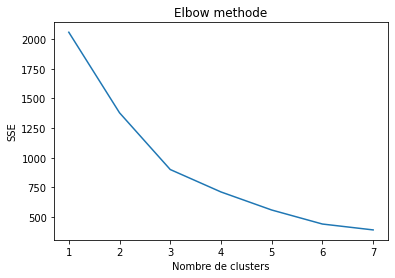

In [19]:
# Choisir le meilleur cluster
  # A list holds the SSE values for each k
sse = []
for k in range(1, 8):
   kmeans = KMeans(n_clusters=k, random_state=0)
   kmeans.fit(scaled_features)
   sse.append(kmeans.inertia_)
   
plt.plot(range(1, 8), sse)
plt.title('Elbow methode')
plt.xlabel("Nombre de clusters")
plt.ylabel("SSE")
plt.show()

100%|██████████| 6/6 [00:00<00:00, 18.67it/s]


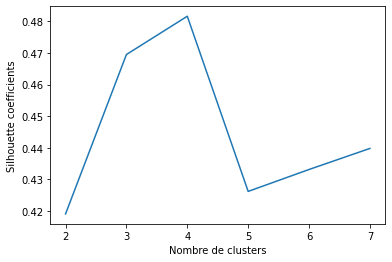

In [20]:
# Silhouette score

silhouette_coefficients = []

# Il faut au minimum 2 clusters pour le silhouette score
for k in tqdm(range(2, 8)):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.plot(range(2,8), silhouette_coefficients)
plt.xlabel("Nombre de clusters")
plt.ylabel("Silhouette coefficients")
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.41909875526102175
For n_clusters = 3 The average silhouette_score is : 0.46951066796744745
For n_clusters = 4 The average silhouette_score is : 0.4816163464894825
For n_clusters = 5 The average silhouette_score is : 0.4262030292847785
For n_clusters = 6 The average silhouette_score is : 0.4327964425503
For n_clusters = 7 The average silhouette_score is : 0.44329084149735287


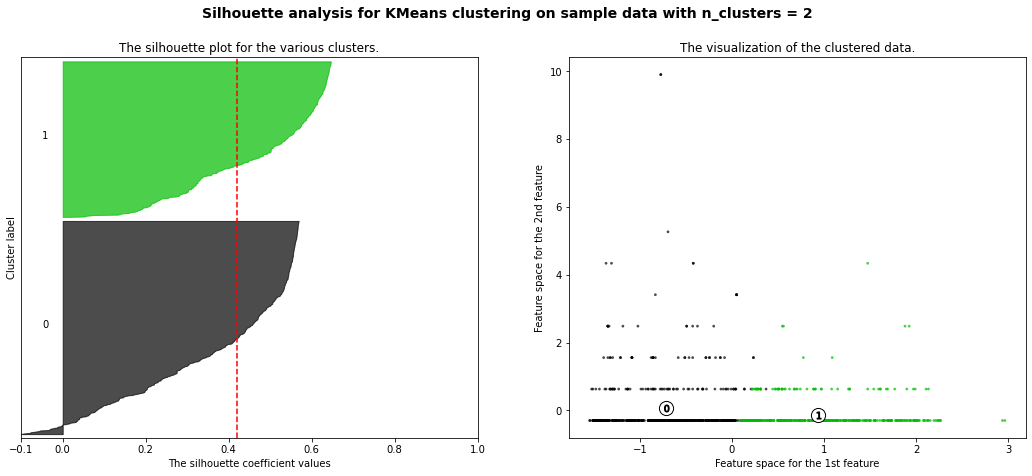

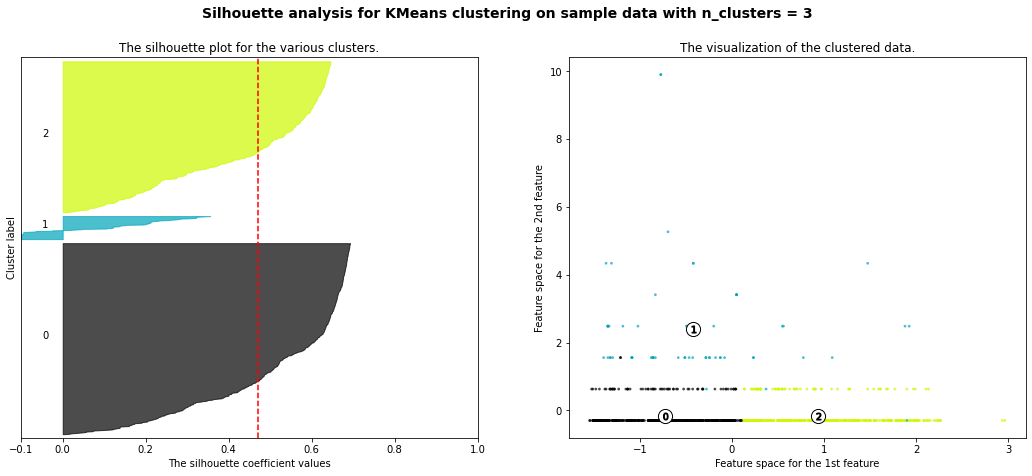

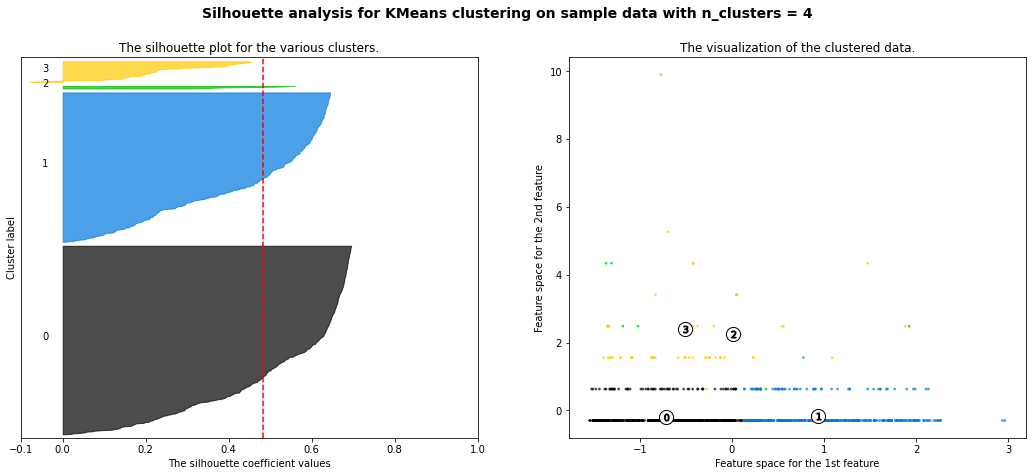

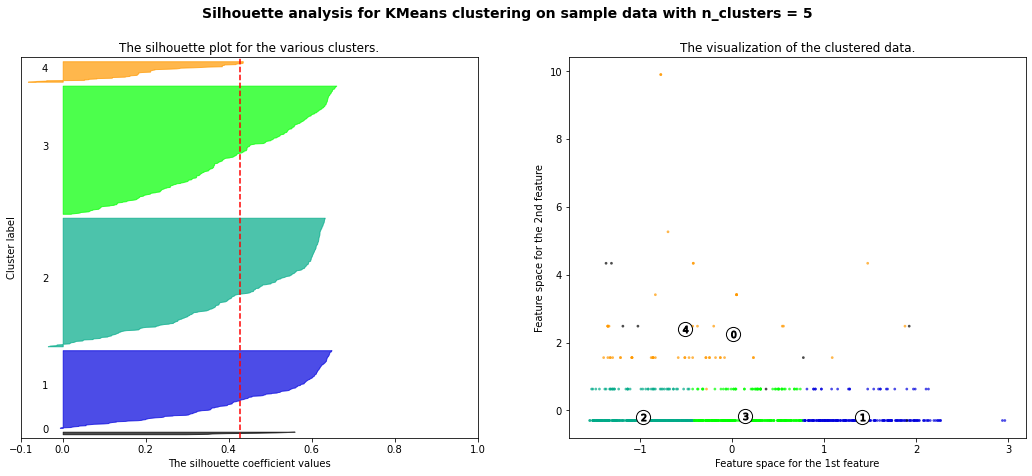

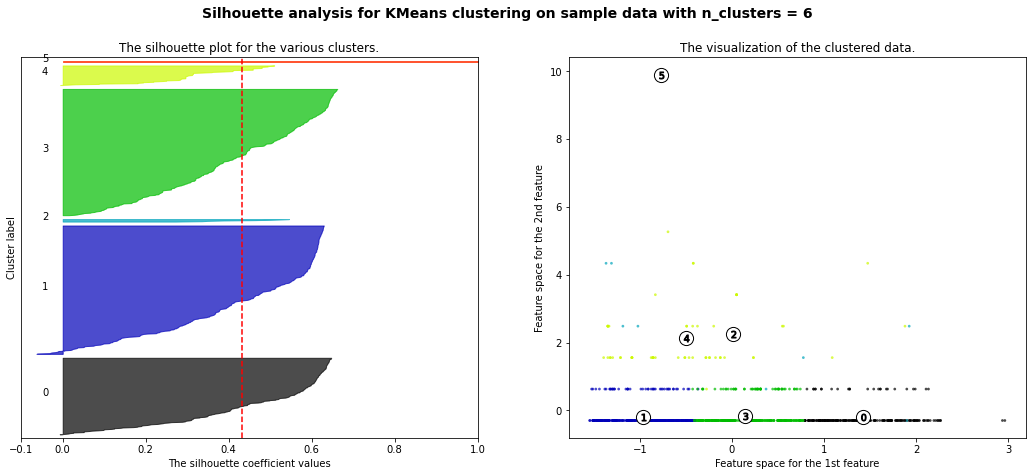

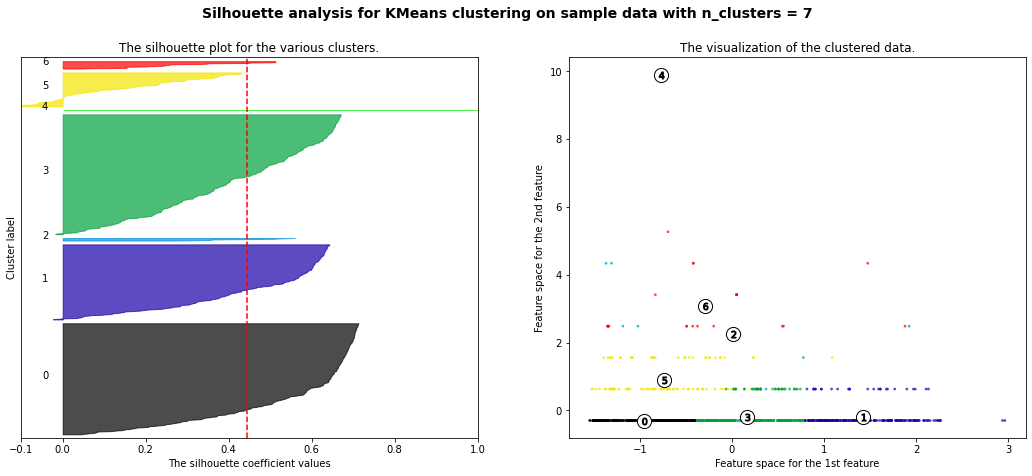

In [21]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py



# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X = scaled_features
y = kmeans.labels_

range_n_clusters = np.arange(2,8,1)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

## Test

In [22]:
kmeansmodel = KMeans(n_clusters=7, random_state=0)
y_kmeans = kmeansmodel.fit_predict(scaled_features)
y_kmeans

array([1, 1, 0, 3, 3, 1, 1, 2, 0, 1, 0, 3, 1, 1, 0, 3, 3, 3, 0, 1, 1, 1,
       1, 2, 0, 3, 0, 0, 0, 0, 0, 3, 3, 1, 1, 0, 0, 1, 1, 3, 3, 1, 0, 1,
       1, 3, 1, 0, 0, 1, 1, 1, 1, 2, 1, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3,
       0, 1, 0, 3, 3, 3, 0, 1, 0, 0, 0, 1, 1, 1, 1, 2, 3, 0, 0, 3, 3, 3,
       3, 0, 0, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 0, 1, 3, 1, 1, 2, 1, 3, 3,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 3, 0, 0, 1, 3, 1, 1, 3, 1, 0, 2, 1,
       1, 0, 2, 1, 3, 0, 3, 1, 1, 2, 3, 1, 1, 2, 2, 0, 1, 0, 3, 1, 3, 1,
       3, 0, 1, 1, 3, 3, 5, 1, 3, 3, 1, 0, 1, 1, 3, 3, 1, 3, 1, 0, 3, 3,
       3, 0, 1, 1, 3, 1, 1, 3, 1, 0, 0, 3, 1, 1, 1, 3, 0, 1, 3, 3, 3, 3,
       1, 1, 3, 1, 3, 0, 2, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 3, 3, 0, 3,
       0, 3, 0, 3, 0, 1, 0, 6, 0, 3, 3, 3, 5, 3, 3, 1, 1, 0, 3, 1, 1, 0,
       1, 1, 1, 3, 1, 3, 0, 1, 1, 3, 0, 3, 0, 5, 5, 3, 1, 3, 3, 0, 1, 0,
       6, 5, 3, 3, 0, 3, 1, 3, 3, 3, 1, 1, 1, 3, 3, 0, 1, 1, 1, 0, 3, 3,
       1, 3, 3, 3, 1, 1, 3, 3, 0, 3, 1, 2, 3, 3, 1,

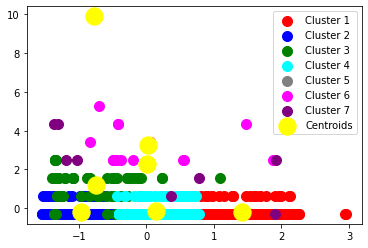

In [23]:
color = ['red', 'blue', 'green', 'cyan', 'grey', 'magenta', 'purple']
for i in range(0,7):
    plt.scatter(scaled_features[y_kmeans == i, 0], scaled_features[y_kmeans == i, 1], s = 100, c = color[i], label = f'Cluster {i+1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()

In [25]:

fig = go.Figure()
for i in range(0,7):
    go.Scatter3d
    fig.add_trace(go.Scatter3d(x=scaled_features[y_kmeans == i, 0], y=scaled_features[y_kmeans == i, 1], z=scaled_features[y_kmeans == i, 2],
                               name=f'Cluster {i+1}',
                               mode='markers'))
    fig.add_trace(go.Scatter3d(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], z=kmeans.cluster_centers_[:, 2],
                                name=f'Centroide {i+1}', 
                                mode='markers', marker=dict(
                                color='orange',
                                size=16
    )))
fig.update_layout(title="test")
fig.show()